# Overview
In this week, we analyze the low pass filter and the high pass filter using Laplace transforms. For doing this, we use the $sympy$ library of python for solving the nodal equations in the $s$-domain. Then, we use the $Poly$ class of $sympy$ to get coefficients and finally use $scipy.signal$ for arriving at results and plotting. 

# Code and Generated Outputs
Importing required libraries and defining the symbol $s$.

In [1]:
from __future__ import division
from sympy import *
import scipy.signal as sp
import pylab as p
init_printing()
s = symbols('s')

Funciton to get the coefficients of numerator polynomial and denominator polynomial given an expression, so that it can be used to construct the transfer funciton using $sp.lti$. It first simplifies the expressions using $sympy.simplify$ and then separates into $num$ (numerator) and $den$ (denominator) using $sympy.fraction$. Then, we use the $Poly$ class to get the coefficients.

In [2]:
def st(y):
    Y = (simplify(y))
    n,d = fraction(Y)
    n,d = Poly(n,s), Poly(d,s)
    num,den = n.all_coeffs(), d.all_coeffs()
    num,den = [float(f) for f in num], [float(f) for f in den]
    return num,den

Function to return the solution of the nodal equations for the low-pass filter given the parameters. Giving $V_i$ as 1 would yield us the transfer function at $V_o$ which is the expression in $V[3]$. We then pass it to $st()$ to get the coefficients of the polynomials in the fraction.

The transfer function for the low-pass filter


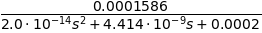

In [3]:
def lowpass(R1,R2,C1,C2,G,Vi):
    A = Matrix([[0,0,1,-1/G],[-1/(1+s*R2*C2),1,0,0],[0,-G,G,1],[-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b = Matrix([0,0,0,-Vi/R1])
    V = A.inv()*b
    return (A,b,V)

A,b,V = lowpass(10000,10000,1e-9,1e-9,1.586,1)
n,d = st(V[3])
print("The transfer function for the low-pass filter")
simplify(V[3])

Using the values of the coefficients obtained above, we get the step response just by adding an extra 0 to the denominator coefficients which is equivalent to multiplying $H(s)$ with $1/s$. We then obtain the plot using $sp.impulse$.

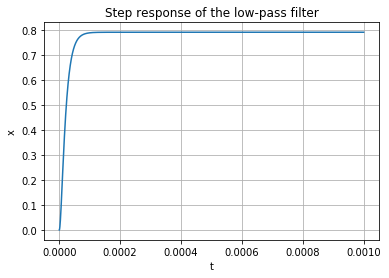

In [4]:
d.append(0)
X = sp.lti(n,d)
d.pop()
t,x = sp.impulse(X,None,p.linspace(0,0.001,5001))
p.xlabel('t')
p.ylabel('x')
p.title("Step response of the low-pass filter")
p.plot(t,x)
p.grid()
p.show()

Next we get the response of the low-pass filter for a sum of sinusoids :
$$ V_i(t) = (sin(2000\pi t)+cos(2.10^6\pi t))*u_o(t)$$
We first make and input and use $signal.lsim$ to obtain the response.

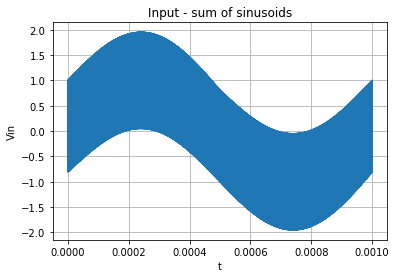

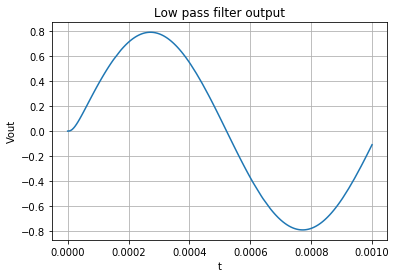

In [5]:
t = p.linspace(0,0.001,5000)
Vin = (p.sin(2000*t*p.pi)+p.cos(2*(10**6)*p.pi*t))
p.title("Input - sum of sinusoids")
p.plot(t,Vin)
p.xlabel('t')
p.ylabel('Vin')
p.grid()
p.show()
X = sp.lti(n,d)
t,y,s_v = sp.lsim(X,Vin,t)
p.title("Low pass filter output")
p.xlabel('t')
p.ylabel('Vout')
p.plot(t,y)
p.grid()
p.show()

Function to get the transfer function of high-pass filter just like we did for the low-pass filter.

The transfer function for the high-pass filter


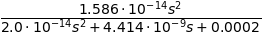

In [6]:
def highpass(R1,R3,C1,C2,G,Vi) :
    s = symbols ('s')
    A = Matrix([[0,-1,0,1/G],[s*C2*R3/(s*C2*R3+1),0,-1,0],[0,G,-G,1],[-s*C2-1/R1-s*C1,0,s*C2,1/R1]])
    b = Matrix([0,0,0,-Vi*s*C1])
    V = A.inv()*b
    return (A,b,V)

A,b,V = highpass(1e4,1e4,1e-9,1e-9,1.586,1)
n,d = st(V[3])
print("The transfer function for the high-pass filter")
simplify(V[3])

Now we find the response for a damping sinusoid of high frequency for a high-pass filter.
$$ V_i(t) = cos(10^7t).e^{-300t}$$

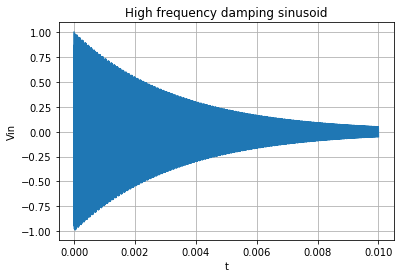

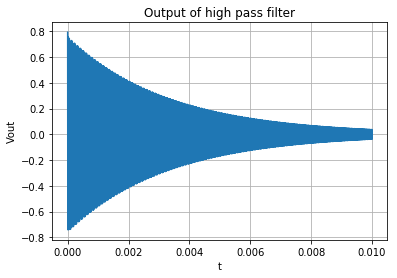

In [7]:
t = p.linspace(0,0.01,5000)
Vin = (p.cos(1e7*t))*p.exp(-300*t)
p.plot(t,Vin)
p.xlabel('t')
p.ylabel('Vin')
p.title('High frequency damping sinusoid')
p.grid()
p.show()
X = sp.lti(n,d)
t,y,s_v = sp.lsim(X,Vin,t)
p.title('Output of high pass filter')
p.xlabel('t')
p.ylabel('Vout')
p.plot(t,y)
p.grid()
p.show()

Next we find the response for a damping sinusoid of high frequency for a high-pass filter.
$$ V_i(t) = cos(10^4t).e^{-300t}$$

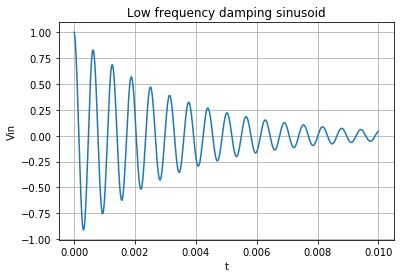

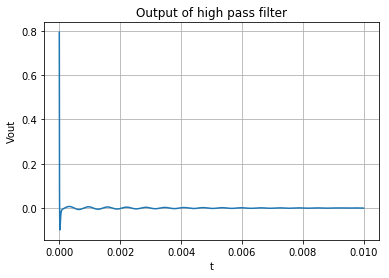

In [8]:
t = p.linspace(0,0.01,5000)
Vin = (p.cos(1e4*t))*p.exp(-300*t)
p.plot(t,Vin)
p.xlabel('t')
p.ylabel('Vin')
p.title('Low frequency damping sinusoid')
p.grid()
p.show()
X = sp.lti(n,d)
t,y,s_v = sp.lsim(X,Vin,t)
p.title('Output of high pass filter')
p.xlabel('t')
p.ylabel('Vout')
p.plot(t,y)
p.grid()
p.show()

Finally, we find the step response of the high-pass filter just like we did for the low-pass filter.

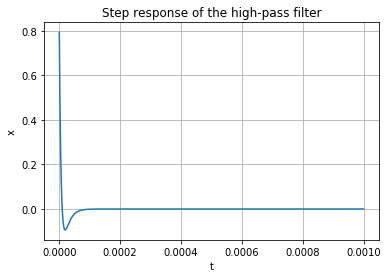

In [9]:
d.append(0)
X = sp.lti(n,d)
d.pop()
t,x = sp.impulse(X,None,p.linspace(0,0.001,5001))
p.title("Step response of the high-pass filter")
p.xlabel('t')
p.ylabel('x')
p.plot(t,x)
p.grid()
p.show()

# Conclusion
The $sympy$ module helped us in analytically solving the equations in the s-domain and then we interpreted these equations using the signals toolbox. We got the step responses of both the filters and saw the responses of the systems for low frequency and high frequency inputs.